In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.metrics as m
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Data Ingestion

In [2]:
A=pd.read_csv("E:/Data Science class/Datasets/50_StartupsFinal.csv")

In [5]:
A.head(10)

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
A.describe()

,RND,ADMIN,MKT,PROFIT
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
RND       50 non-null float64
ADMIN     50 non-null float64
MKT       50 non-null float64
STATE     50 non-null object
PROFIT    50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


# Co-relation Analysis

In [9]:
A.corr()

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


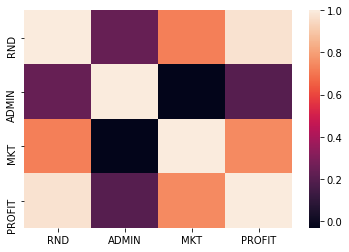

In [10]:
sb.heatmap(A.corr())

# dividing data into training and testing set

In [11]:
X = A[["RND"]]
Y = A[["PROFIT"]]
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=10)

# FIRST model simple linear regression (PROFIT vs RND )

In [12]:

lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest)
MAESLR = m.mean_absolute_error(ytest,pred)


In [13]:
MAESLR

4622.662727991248

# Less the MAE value, better is the model

# SECOND model multiple linear regression (PROFIT vs RND + ADMIN )

In [14]:
X = A[["RND","ADMIN"]]
Y = A[["PROFIT"]]
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=10)

In [15]:
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest)
MAEMLR1 = m.mean_absolute_error(ytest,pred)

In [17]:
MAEMLR1

3873.384207665765

# Removing ADMIN predictor because adding it into the model did not reduce MAE

# THIRD model multiple linear regression (PROFIT vs RND + MKT )

In [18]:

X = A[["RND","MKT"]]
Y = A[["PROFIT"]]
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=10)

In [19]:
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest)
MAEMLR2 = m.mean_absolute_error(ytest,pred)

In [20]:
MAEMLR2

2921.432355300559

# ABOVE MODEL FOR PROFIT VS RND+MKT IS THE BEST SUITABLE MODEL AMONGST ABOVE 3 MODELS FOR PREDICTING THE Y VARIABLE i.e. PROFIT

# OLS TECHNIQUE

# FIRST model (RND vs PROFIT)

In [22]:
X=A[['RND']]
Y=A[['PROFIT']]
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=10)
XCONST = sm.add_constant(xtrain)
OLSmodel = sm.OLS(ytrain,XCONST)
est2 = OLSmodel.fit()
est2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PROFIT   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     549.8
Date:                Sun, 26 Jan 2020   Prob (F-statistic):           3.34e-24
Time:                        09:35:09   Log-Likelihood:                -425.00
No. Observations:                  40   AIC:                             854.0
Df Residuals:                      38   BIC:                             857.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.948e+04   3144.649     15.734      0.000    4.31e+04    5.58e+04
RND            0.8488      0.036     23.447      0.000       0.776       0.922
==============================================================================
Omnibus:                       11.879   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.135
Skew:                          -0.969   Prob(JB):                      0.00141
Kurtosis:                       5.030   Cond. No.                     1.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# SECOND model (RND & ADMIN vs PROFIT)

In [23]:
X = A[["RND","ADMIN"]]
Y = A[["PROFIT"]]
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=10)
XCONST = sm.add_constant(xtrain)
OLSmodel = sm.OLS(ytrain,XCONST)
est2 = OLSmodel.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PROFIT   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     270.2
Date:                Sun, 26 Jan 2020   Prob (F-statistic):           8.41e-23
Time:                        09:36:09   Log-Likelihood:                -424.83
No. Observations:                  40   AIC:                             855.7
Df Residuals:                      37   BIC:                             860.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.337e+04   7514.472      7.102      0.000    3.81e+04    6.86e+04
RND            0.8540      0.038     22.694      0.000       0.778       0.930
ADMIN         -0.0350      0.061     -0.571      0.571      -0.159       0.089
==============================================================================
Omnibus:                       12.222   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.536
Skew:                          -1.001   Prob(JB):                      0.00115
Kurtosis:                       5.028   Cond. No.                     6.81e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# THIRD model (RND & MKT vs PROFIT)

In [24]:
X = A[["RND","MKT"]]
Y = A[["PROFIT"]]

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=10)
XCONST = sm.add_constant(xtrain)
OLSmodel = sm.OLS(ytrain,XCONST)
est2 = OLSmodel.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PROFIT   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     280.9
Date:                Sun, 26 Jan 2020   Prob (F-statistic):           4.28e-23
Time:                        09:36:48   Log-Likelihood:                -424.10
No. Observations:                  40   AIC:                             854.2
Df Residuals:                      37   BIC:                             859.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.766e+04   3409.114     13.981      0.000    4.08e+04    5.46e+04
RND            0.7983      0.053     15.157      0.000       0.692       0.905
MKT            0.0258      0.020      1.310      0.198      -0.014       0.066
==============================================================================
Omnibus:                       11.546   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.582
Skew:                          -0.950   Prob(JB):                      0.00185
Kurtosis:                       4.984   Cond. No.                     5.54e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""